# Three-densy layers Neural Network for solving the 1-particle Schrödinger equation

This neural network (with three-sensy layers) is solving the 1-particle Schrödinger equation, using TensorFlow. Matplotlib graph shows us the wave-function visualization, probability density and it`s position on OX. Here used the Adam optimizer with a learning rate of 0.001.   


In [97]:
# Importing the necessary libraries
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt 

In [98]:
# Define the neural network architecture
tf.keras.backend.set_floatx('float64')
class SchrodingerNet(tf.keras.Model):
    def __init__(self):
        super(SchrodingerNet, self).__init__()
        self.dense1 = tf.keras.layers.Dense(32, activation='relu')
        self.dense2 = tf.keras.layers.Dense(32, activation='relu')
        self.dense3 = tf.keras.layers.Dense(1, activation='linear')
    
    def call(self, x):
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.dense3(x)
        return x

In [99]:
# Create an instance of the SchrodingerNet model
model = SchrodingerNet()

In [100]:
# Define the loss function (MSE) for the neural network
def loss_fn(y_true, y_pred):
    return tf.reduce_mean(tf.square(tf.abs(y_true - y_pred)))

In [101]:
# Define the optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [102]:
# Generate example data for training
x_train = np.linspace(-5, 5, 1000).reshape(-1, 1).astype(np.float64)
y_train = np.sqrt(2/np.pi) * np.exp(-np.square(x_train)) * np.sin(x_train)

In [103]:
# Perform training
for epoch in range(100):
    with tf.GradientTape() as tape:
        y_pred = model(x_train)
        loss_value = loss_fn(y_train, y_pred)
    
    grads = tape.gradient(loss_value, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {loss_value.numpy()}")

Epoch 0: Loss = 0.05061039705496951
Epoch 10: Loss = 0.018655716923730196
Epoch 20: Loss = 0.013950374659597538
Epoch 30: Loss = 0.01095988100266727
Epoch 40: Loss = 0.008926575229048815
Epoch 50: Loss = 0.007414370737858333
Epoch 60: Loss = 0.00629860657139327
Epoch 70: Loss = 0.005484633638621105
Epoch 80: Loss = 0.004883673083737414
Epoch 90: Loss = 0.00444772186017683


In [104]:
# Generate test data
x_test = np.linspace(-10, 10, 1000).reshape(-1, 1).astype(np.float64)

In [105]:
# Predict the wave function using the trained model
y_pred_test = model(x_test)

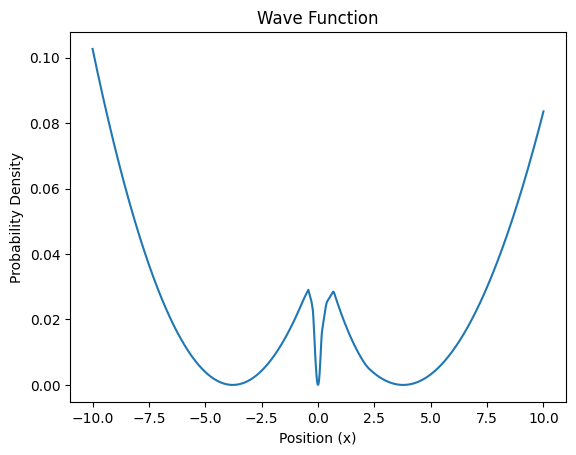

In [106]:
# Plot the results
plt.plot(x_test, np.abs(y_pred_test) ** 2)
plt.xlabel('Position (x)')
plt.ylabel('Probability Density')
plt.title('Wave Function')
plt.show()